In [1]:
# Basic Libraries
import sys                                                        # imports the usual sys library
import math                                                       # imports the usual math library
import numpy as np                                                # imports the Numpy Library
from tqdm import tqdm                                             # imports the tqdm library
from scipy.integrate import quad                                  # imports the integration command quad from the scipy library

# Importing the NumCosmo Library
from numcosmo_py import Nc, Ncm                                   # imports the NumCosmo library
# from numcosmo_py.plotting.tools import set_rc_params_article      # imports Numcosmo plotting tools
# set_rc_params_article(ncol=1)

# Plotting
import matplotlib as mpl                                          # imports the full Matplotlib Library
import matplotlib.pyplot as plt                                   # imports the pyplot module from Matplotlib Library
import matplotlib.colors as colors                                # impors the colors module from Matplotlib Library
import matplotlib.cm as cmx                                       # imports the cmx module from Matplotlib Library
# mpl.rcParams['text.usetex'] = True                                # enables the use of TeX on graphs
# plt.rc('text.latex', preamble=r'\usepackage{amssymb}')            # sets the preamble for TeX

# Imports useful commands for the 2fluid model
import two_fluid_key as tf                                        # imports the two_fluid_key.py file, where the relevant quantities are defined

In [22]:
# important times
min_alpha_c = -170.0                                            # defines the initial value of the time variable alpha (α) during the contraction phase
max_alpha_c = -20                                                # defines the final value for α
min_alpha_scale = 1.0e-14                                       # defines the minimum scale e.g. the minimum step of α
np_plot = 10000                                                  # plotting variable of the Numpy library

# Time arrays for the contraction phase
alpha_c = np.linspace(min_alpha_c, max_alpha_c, np_plot)        # defines the α interval for the contraction phase

In [23]:
# definition of the model

twofluid = Nc.HICosmoQGRW()                                  # defines a cosmological model, which is represented by a NumCosmo object. Then, the relevant cosmological parameters are added to this object

# these lines set the relevant cosmological parameters
k = 1.0         # sets a fiducial value of k
Ωr = 1.0e-5     # abundance of radiation
w = 1.0e-10      # equation of state parameter of dark matter
xb = 1e30       # inverse of scale factor at the bounce, xb = 1/ab

# this lines set the attributes of the cosmological model
twofluid.props.w = w                                         # dust/dark matter equation of state parameter
twofluid.props.Omegar = Ωr                                   # radiation abundance today
twofluid.props.Omegaw = 1.0 * ( 1.0 - Ωr )                   # dust/dark matter abundance today
twofluid.props.xb = xb                                       # inverse scale factor xb=1/ab at the time of the bounce

# evolution of the model
twofluid_c = tf.model_evol(twofluid,alpha_c,k)               # evolves the equations of motion for during the contraction phase using the twofluid_key.py commands

In [24]:
# scale factor a(α)
def a(α, aB = 1.0e-30):
  return aB * np.exp(np.abs(α))                                # defines the scale factor a(α) as a function of logarithmic time α

# scale factor at the bounce
aB = 1 / twofluid.xb()

# scale factor interval for contraction phase
a_c = a(alpha_c) / aB

In [25]:

%%time
k_list = [1.80952534e+14, 1.80951638e-02, 1.80951638e-13]                                         # sets the k_list to be equal the k_paper list
#k_list = [1,kc]                                            # defines a testing list. Uncomment this line to make the code go faster

# precision parameters
p1 = 1.0e-4
p2 = 0.0

# Generates the Modes & Models
mode1_list = [tf.mode_1(k,twofluid, p1, p2, max_alpha_c ) for k in k_list]  # generates a list with each mode associated to the Initial Condition 1 for our cosmological model
mode2_list = [tf.mode_2(k,twofluid, p1, p2, max_alpha_c) for k in k_list]  # generates a list with each mode associated to the Initial Condition 2 for our cosmological model
model_list = [tf.model_evol(twofluid, alpha_c, k) for k in k_list]  # generates a list of evolved models for each k


[CVODE WARNING]  CVode
  Internal t = -47.6086 and h = 2.55159e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODE WARNING]  CVode
  Internal t = -47.6086 and h = 2.55159e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODE WARNING]  CVode
  Internal t = -47.6086 and h = 2.32003e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODE WARNING]  CVode
  Internal t = -47.6086 and h = 2.32003e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODE WARNING]  CVode
  Internal t = -47.6086 and h = 3.54203e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODE WARNING]  CVode
  Internal t = -47.6086 and h = 3.54203e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODE WARNING]  CVode
  Internal t = -47.6086 and h = 1.56165e-15 are such that t + h = t on the next step. The solver will continue a

CPU times: user 5min 46s, sys: 5.99 ms, total: 5min 46s
Wall time: 5min 46s


In [30]:
# prints the length of each mode for Initial Condition 1
for init in mode1_list:
  print( 'k = ' + f"{init.k:.2e}" + ' => ' + str(len(init.zeta_r()) ) )

# a sepator between the two initial conditions
print('----------------------------------------------------------------------------------------------------')

# prints the length of each mode for Initial Condition 2
for init in mode2_list:
  print( 'k = ' + f"{init.k:.2e}" + ' => ' + str(len(init.zeta_r()) ) )

k = 1.81e+14 => 3679
k = 1.81e-02 => 2249
k = 1.81e-13 => 1474
----------------------------------------------------------------------------------------------------
k = 1.81e+14 => 3147
k = 1.81e-02 => 3649
k = 1.81e-13 => 4024


In [31]:
def change_size(S = 25):
  plt.rc('font', size=S)          # controls default text sizes
  plt.rc('axes', titlesize=S)     # fontsize of the axes title
  plt.rc('axes', labelsize=S)    # fontsize of the x and y labels
  plt.rc('xtick', labelsize=S)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=S)    # fontsize of the tick labels
  plt.rc('legend', fontsize=S)    # legend fontsize
  plt.rc('figure', titlesize=S)  # fontsize of the figure title

change_size()

In [32]:
import scipy.constants as ct
s = twofluid.RH_Mpc()                             # converts from Hubble radius to Mpc⁻¹ using the implemented Rh_Mpc NumCosmo method
Pl = ct.physical_constants['Planck length'][0]
p = ct.parsec
ly = ct.light_year
#f = ( Pl / (p*s * (10*6)) )*2
f1 = ( Pl / (p*s * (10**6)) )
f2 = ( Pl * (p*s * (10**6)) )

[180952534000000.0, 0.0180951638, 1.80951638e-13]
[-47.20657351 -47.20185285 -47.19713267 ... -20.09226575 -20.02130805
 -20.        ]
[3.17361607e-10 3.15866981e-10 3.14379543e-10 ... 5.32059430e-22
 4.95614048e-22 4.85165195e-22]
[-89.22698772 -89.21804717 -89.20884515 ... -20.08288298 -20.02303912
 -20.        ]
[5.63363110e+08 5.58348779e+08 5.53234409e+08 ... 5.27090585e-22
 4.96472732e-22 4.85165195e-22]
[-114.55542375 -114.5350763  -114.51354959 ...  -20.10188706  -20.02882344
  -20.        ]
[5.63363110e+19 5.52015946e+19 5.40259845e+19 ... 5.37203243e-22
 4.99352809e-22 4.85165195e-22]


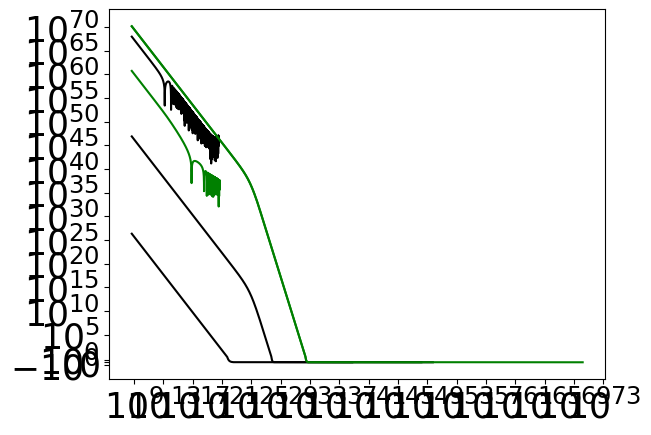

CPU times: user 400 ms, sys: 27.8 ms, total: 428 ms
Wall time: 429 ms


In [33]:
%%time
print( k_list)
change_size()
for i in range(len(k_list)):
    init1 = mode1_list[i]
    init2 = mode2_list[i]
    spec_m1 = init1.k**3 * (init1.zeta_r()**2 + init1.zeta_r()**2) 
    spec_m2 = init2.k**3 * (init2.zeta_r()**2 + init2.zeta_r()**2) 
    print(init1.t)
    print(a(init1.t))
    #spec_final = ((f1**2)/ (2 * (np.pi**2)) ) * ( spec_m1 + spec_m2 )

    plt.plot(a(init1.t)/aB, spec_m1 , label = r'$\zeta_{k1}(a)$', color='black')   
    plt.plot(a(init2.t)/aB, spec_m2 , label = r'$\zeta_{k1}(a)$', color='green')   
    # plt.plot(a(init1.t)/aB, init1.zeta_r() , label = r'$\zeta_{k1}(a)$', color='red')                         # plots ζk1, the adiabatic mode associated to Initial Condition 1
    # plt.plot(a(init2.t)/aB, init2.zeta_r(), label = r'$\zeta_{k2}(a)$' , color='blue') 
    plt.xscale('symlog')
    plt.yscale('symlog')
#print(a(init1.t)/aB, init1.t)
plt.show()